# Content
1. [Import dataSet](#1-Import-dataSet)

2. [DataSet Visualization](#2.-DataSet-Visualization)
    - [2.1 Plot all Features](#2.1-Plot-all-Features)
    - [2.2 Plot two Features](#2.2-Plot-two-Features)
3. [Machine Learning](#3.-Machine-Learning)
    - [3.1 Train/Test Dataset](#3.1-Train/Test-Dataset)
    - [3.2 Fit the Model](#3.2-Fit-the-Model)
    - [3.3 Evaluation](#3.3-Evaluation)
    

## 1 Import dataSet

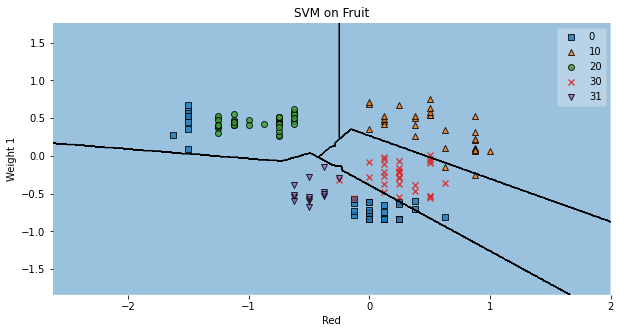

In [1]:
# !pip install ipynb
from ipynb.fs.full.ml_dataset import *

In [2]:
ds

,Red,Green,Blue,W1,Pot1,W2,Pot2,W3,Pot3,Fruit
0,107.0,82.0,63.0,0.0,76.0,0.0,76.0,0.0,76.0,0.0
1,106.0,82.0,63.0,11.5,77.0,32.5,77.0,26.0,77.0,0.0
2,108.0,80.0,62.0,0.0,80.5,0.0,80.5,0.0,80.5,0.0
3,108.0,81.0,63.0,0.0,75.5,0.0,75.5,7.5,75.5,0.0
4,109.0,80.0,62.0,1.0,78.0,15.5,78.0,0.0,78.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9,102.0,82.0,65.0,62.0,190.5,199.0,190.5,75.0,190.5,31.0
10,104.0,81.0,65.0,133.5,152.5,20.0,152.5,77.5,152.5,31.0
11,102.0,82.0,65.0,88.0,245.0,132.0,245.0,148.5,245.0,31.0
12,104.0,81.0,64.0,64.5,154.5,69.0,154.5,63.0,154.5,31.0


## 2. DataSet Visualization

### 2.1 Plot all Features

In [3]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
aaa = pd.melt(ds)
# sns.scatterplot(data=aaa, x="variable", y="value")

<Figure size 648x432 with 0 Axes>

In [4]:
# Scatter Plot Matrix
import seaborn as sns
# sns.pairplot(ds)

In [5]:
# Plot Line Graphic
# print(len(ds))
plt.figure(figsize=(20,10))
x = np.linspace(0, len(ds), len(ds))
y = ds.loc[:,'Red':'Pot3']
# plt.plot(x,y,'-o')
# plt.show()

<Figure size 1440x720 with 0 Axes>

### 2.2 Plot two Features

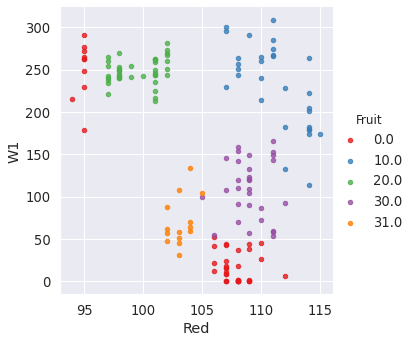

In [6]:
import seaborn as sns; sns.set(font_scale=1.2)
sns.lmplot('Red', 'W1', data=ds, hue='Fruit',
           palette='Set1', fit_reg=False, scatter_kws={"s": 20})

## 3. Machine Learning

### 3.1 Train/Test Dataset
Loading the Fruit dataset from scikit-learn. Splitting data into 80% training and 20% test data:

In [7]:
from sklearn.model_selection import train_test_split

X = ds.drop('Fruit', axis=1)
X = X.to_numpy()
y = ds['Fruit']
y = y.to_numpy(dtype='int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
print('Class labels:', np.unique(y))

Class labels: [ 0 10 20 30 31]


### 3.2 Standardizing the features

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 3.3 Training a perceptron

In [9]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

### 3.4 Evaluation

In [10]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [11]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.88


In [12]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.88


Training a perceptron model using the standardized training data:

ValueError: X has 2 features per sample; expecting 9

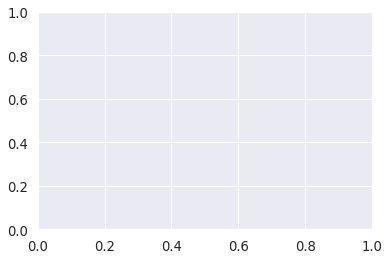

In [13]:
from mlxtend.plotting import plot_decision_regions

X_combined_std = np.vstack((X_train_std, X_test_std))
feature = [0,3] # show features: '0:Red', '3:Weight1'
X_combined_std_2f = X_combined_std[:, feature]
y_combined = np.hstack((y_train, y_test))

# plot_decision_regions(X_combined_std_2f, y_combined, clf=ppn)


plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

In [ ]:
plot_decision_regions?